# Get Immutable Reference Benchmarks

In [9]:
# select measurement file
#file_name = "../output/2024-05-22 10-14-20 get1.json"
file_name = "../output/2024-11-19 11-10-13 full small.json"

# select style options
grey_fill_between = False

enable_storage_reference = False

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}

In [10]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [11]:
from util.convert import convert_datasets
import pandas as pd

ovpm = convert_datasets(
    raw_data,
    "OVPM",
    [("get_min", "Best Case"), ("get_case_1", "Hybrid"), ("get_max", "Worst Case")],
    ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"]
)

baseline = convert_datasets(
    raw_data,
    "Baseline",
    [("baseline_get_min", "Best Case"), ("baseline_get_max_min", "Worst-Best Case"), ("baseline_get_min_max", "Best-Worst Case"), ("baseline_get_max", "Worst Case")],
    ["mean", "min", "max", "options.object_size", "options.bucket_size", "options.modules", "machine_name", "cold_start", "repetitions"]
)

dataset = pd.concat([ovpm, baseline])
dataset.head()

,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions,ticks_per_ms,dataset_type,benchmark_title,options.bucket_size
0,795.9,792,831,0,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,OVPM,Best Case,NaN
1,855.2,855,856,32,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,OVPM,Best Case,NaN
2,855.6,855,856,64,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,OVPM,Best Case,NaN
3,862.2,862,863,96,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,OVPM,Best Case,NaN
4,748.2,748,749,128,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,OVPM,Best Case,NaN


In [12]:
from util.convert import display_dataset_infos

display_dataset_infos(dataset)

min    46.3125
max    57.8750
Name: mean, dtype: float64

min     488.69375
max    1216.58750
Name: mean, dtype: float64

min    1525.30000
max    2247.55625
Name: mean, dtype: float64

min   NaN
max   NaN
Name: mean, dtype: float64

min   NaN
max   NaN
Name: mean, dtype: float64

min    34.89375
max    34.91250
Name: mean, dtype: float64

min   NaN
max   NaN
Name: mean, dtype: float64

min    1885.500
max    1885.525
Name: mean, dtype: float64

min    38.44375
max    38.46250
Name: mean, dtype: float64

min    1146.23125
max    1146.25625
Name: mean, dtype: float64

# Plot Settings

In [13]:
unit = "ms"
plotted_object_sizes = [32, 128, 512]

# Final Plot

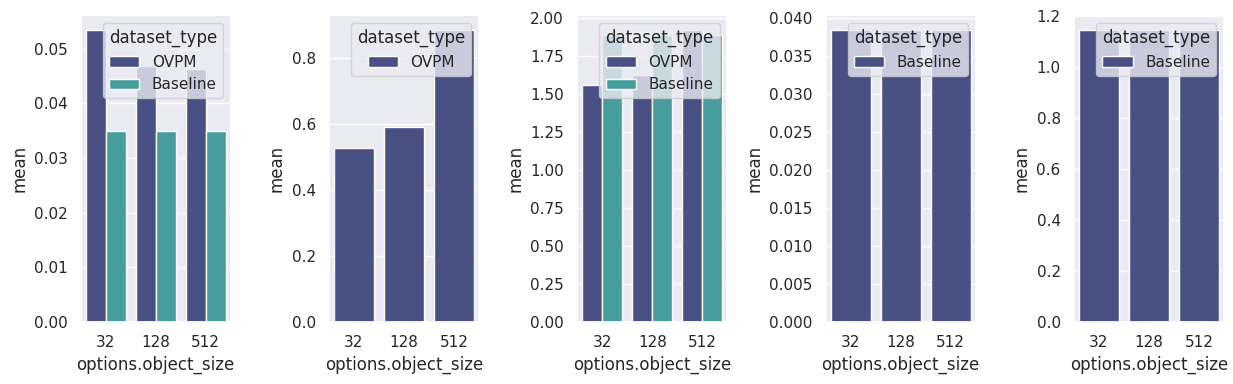

In [14]:
from util.plot import set_theme
from util.convert import scale_data, scale_and_filter_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme(colors=2)

titles = dataset["benchmark_title"].unique()

fig, axes = plt.subplots(1, len(titles))
fig.set_figheight(4)
fig.set_figwidth(12.5)

axes = axes.flatten()

i = 0
for benchmark_title in titles:
    filtered = dataset[dataset["benchmark_title"] == benchmark_title]
    filtered = scale_and_filter_data(filtered, unit, plotted_object_sizes)
    g = sns.barplot(
        data=filtered,
        x="options.object_size", y="mean", hue="dataset_type",
        #errorbar="sd", alpha=.8, height=6,
        ax=axes[i],
    )
    i += 1


plt.close(2)
plt.close(3)
plt.tight_layout()

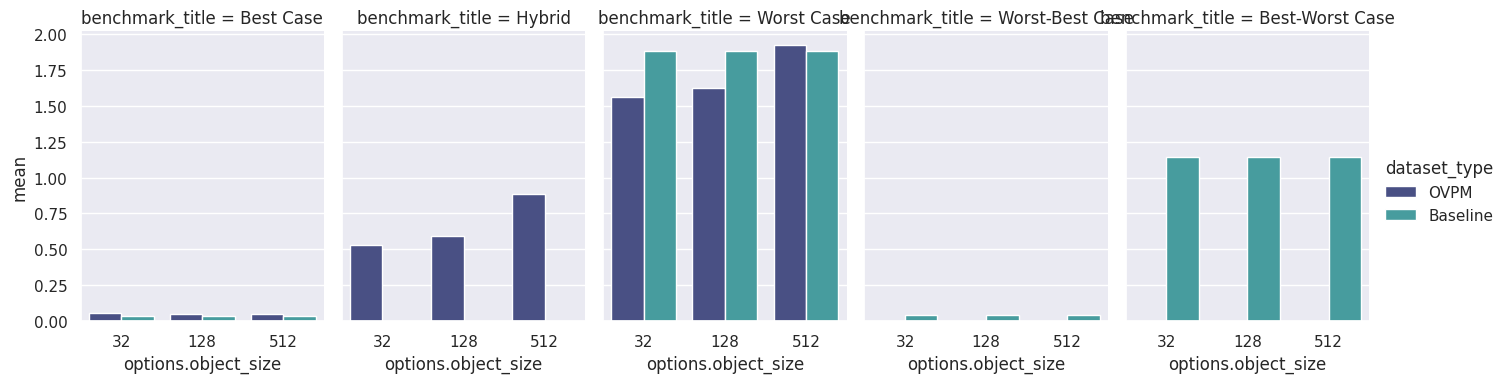

In [15]:
from util.plot import set_theme
from util.convert import scale_data, scale_and_filter_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme(colors=2)

unit = "ms"
filtered = scale_and_filter_data(dataset, unit, plotted_object_sizes)

g = sns.catplot(
    data=filtered,
    kind="bar",
    x="options.object_size", y="mean", hue="dataset_type", col="benchmark_title",
    errorbar="sd", alpha=1, aspect=.7, height=4
)
